In [1]:
import caiman as cm
import numpy as np
import matplotlib.pyplot as plt
from caiman.source_extraction.cnmf.cnmf import load_CNMF
from pathlib import Path
import pickle
import glob
import gc

2023-02-27 16:46:04.765215: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [47]:
data_path = Path("/ceph/imaging1/arie")

sessions ={'429420_toms': ['20230202','20230203','20230210','20230211','20230213','20230214'],
           '429419_croc': ['20230202','20230203','20230210','20230211','20230213','20230214']}

compute = False
save_resutls = False


In [51]:
if compute:

    mean_imgs = {}
    frame_avgs = {}

    for animal in sessions.keys():
        mean_imgs[animal] = {}
        frame_avgs[animal] = {}

        for date in sessions[animal]:
            animal_n = animal.split('_')[0]
            session_path = data_path.joinpath(f'{animal}/{date}_{animal_n}')
            print(f'Computing {session_path}')

            try:
                tif_file = glob.glob(str(session_path)+'/*.tif')[0]
                log_file = glob.glob(str(session_path)+'/*.b64')[0]

            except IndexError:
                print('Files not found, skipping session')


            movie = cm.load(tif_file)
            mean_img = np.mean(movie,axis=0)
            fr_avg = np.mean(movie,axis=(1,2))

            mean_imgs[animal][date] = mean_img
            frame_avgs[animal][date] = fr_avg

            del(movie)
            gc.collect()
            
    if save_results:
        with open('/ceph/imaging1/davide/2p_data/data_quality/mean_imgs.pickle','wb') as file:
            pickle.dump(mean_imgs,file,protocol=pickle.HIGHEST_PROTOCOL)
    
        with open('/ceph/imaging1/davide/2p_data/data_quality/frame_avgs.pickle','wb') as file:
            pickle.dump(frame_avgs,file,protocol=pickle.HIGHEST_PROTOCOL)
            
else:
    
    with open('/ceph/imaging1/davide/2p_data/data_quality/mean_imgs.pickle','rb') as file:
            mean_imgs = pickle.load(file)
            
    with open('/ceph/imaging1/davide/2p_data/data_quality/frame_avgs.pickle','rb') as file:
            frame_avgs = pickle.load(file)
            
    
        
        

EOFError: Ran out of input

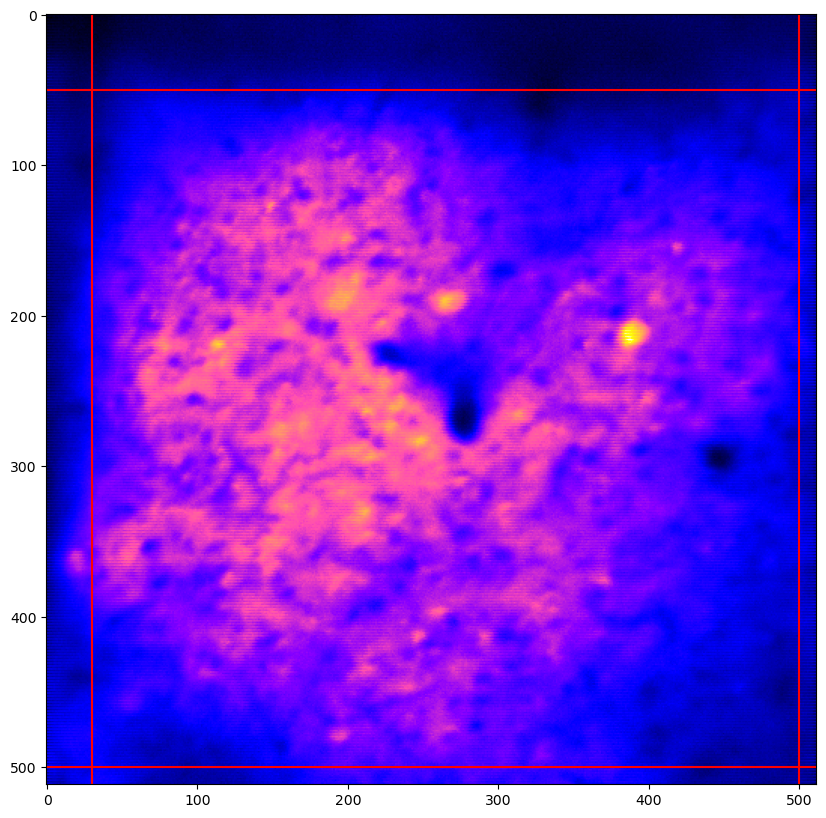

In [52]:
animal = '429420_toms'
date = '20230203'

cropping = [50, 500, 30,500]

plt.figure(figsize=(10,10))
plt.imshow(mean_imgs[animal][date],cmap=plt.cm.gnuplot2)

plt.axhline(y=cropping[0],c='r')
plt.axhline(y=cropping[1],c='r')
plt.axvline(x=cropping[2],c='r')
plt.axvline(x=cropping[3],c='r')





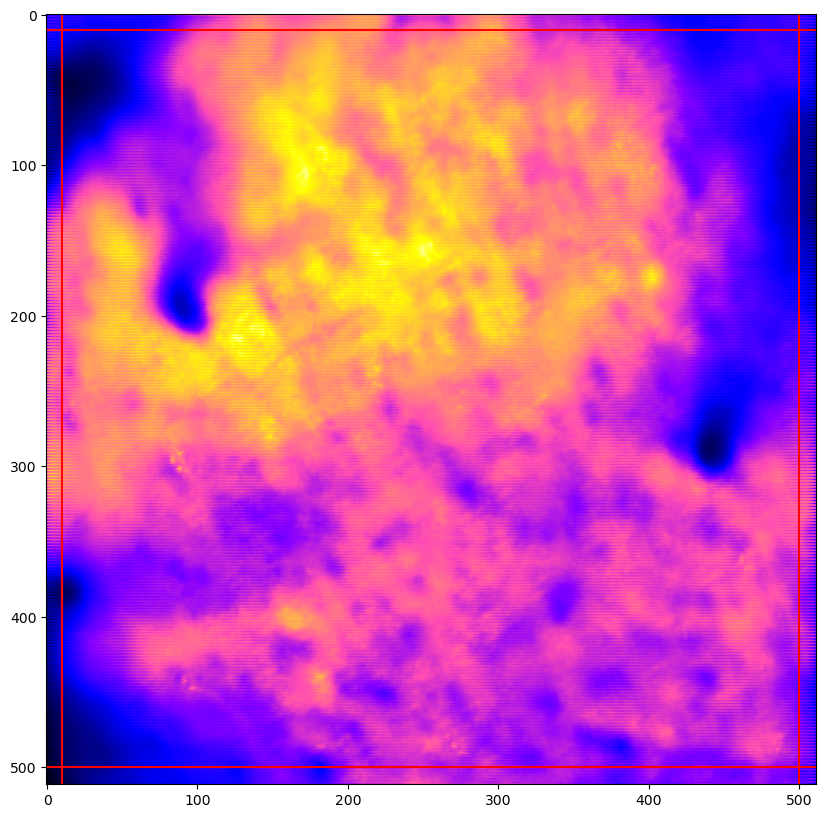

In [30]:
animal = '429419_croc'
date = '20230202'

cropping = [10, 500, 10,500]

plt.figure(figsize=(10,10))
plt.imshow(mean_imgs[animal][date],cmap=plt.cm.gnuplot2)

plt.axhline(y=cropping[0],c='r')
plt.axhline(y=cropping[1],c='r')
plt.axvline(x=cropping[2],c='r')
plt.axvline(x=cropping[3],c='r')


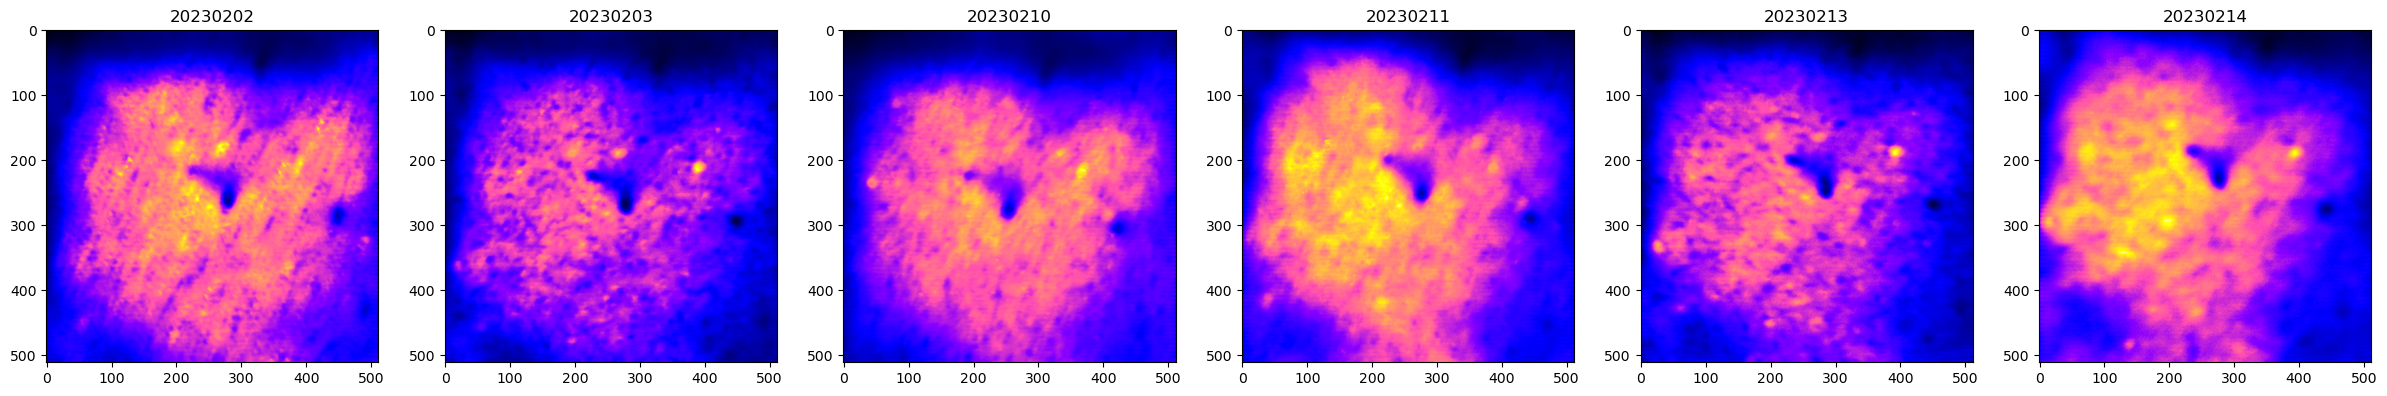

In [35]:
animal = '429420_toms'

plt.figure(figsize=(30,5))
for i,date in enumerate(sessions[animal]):
    plt.subplot(1,len(sessions[animal]),i+1)
    plt.title(date)
    plt.imshow(mean_imgs[animal][date],cmap=plt.cm.gnuplot2)
    

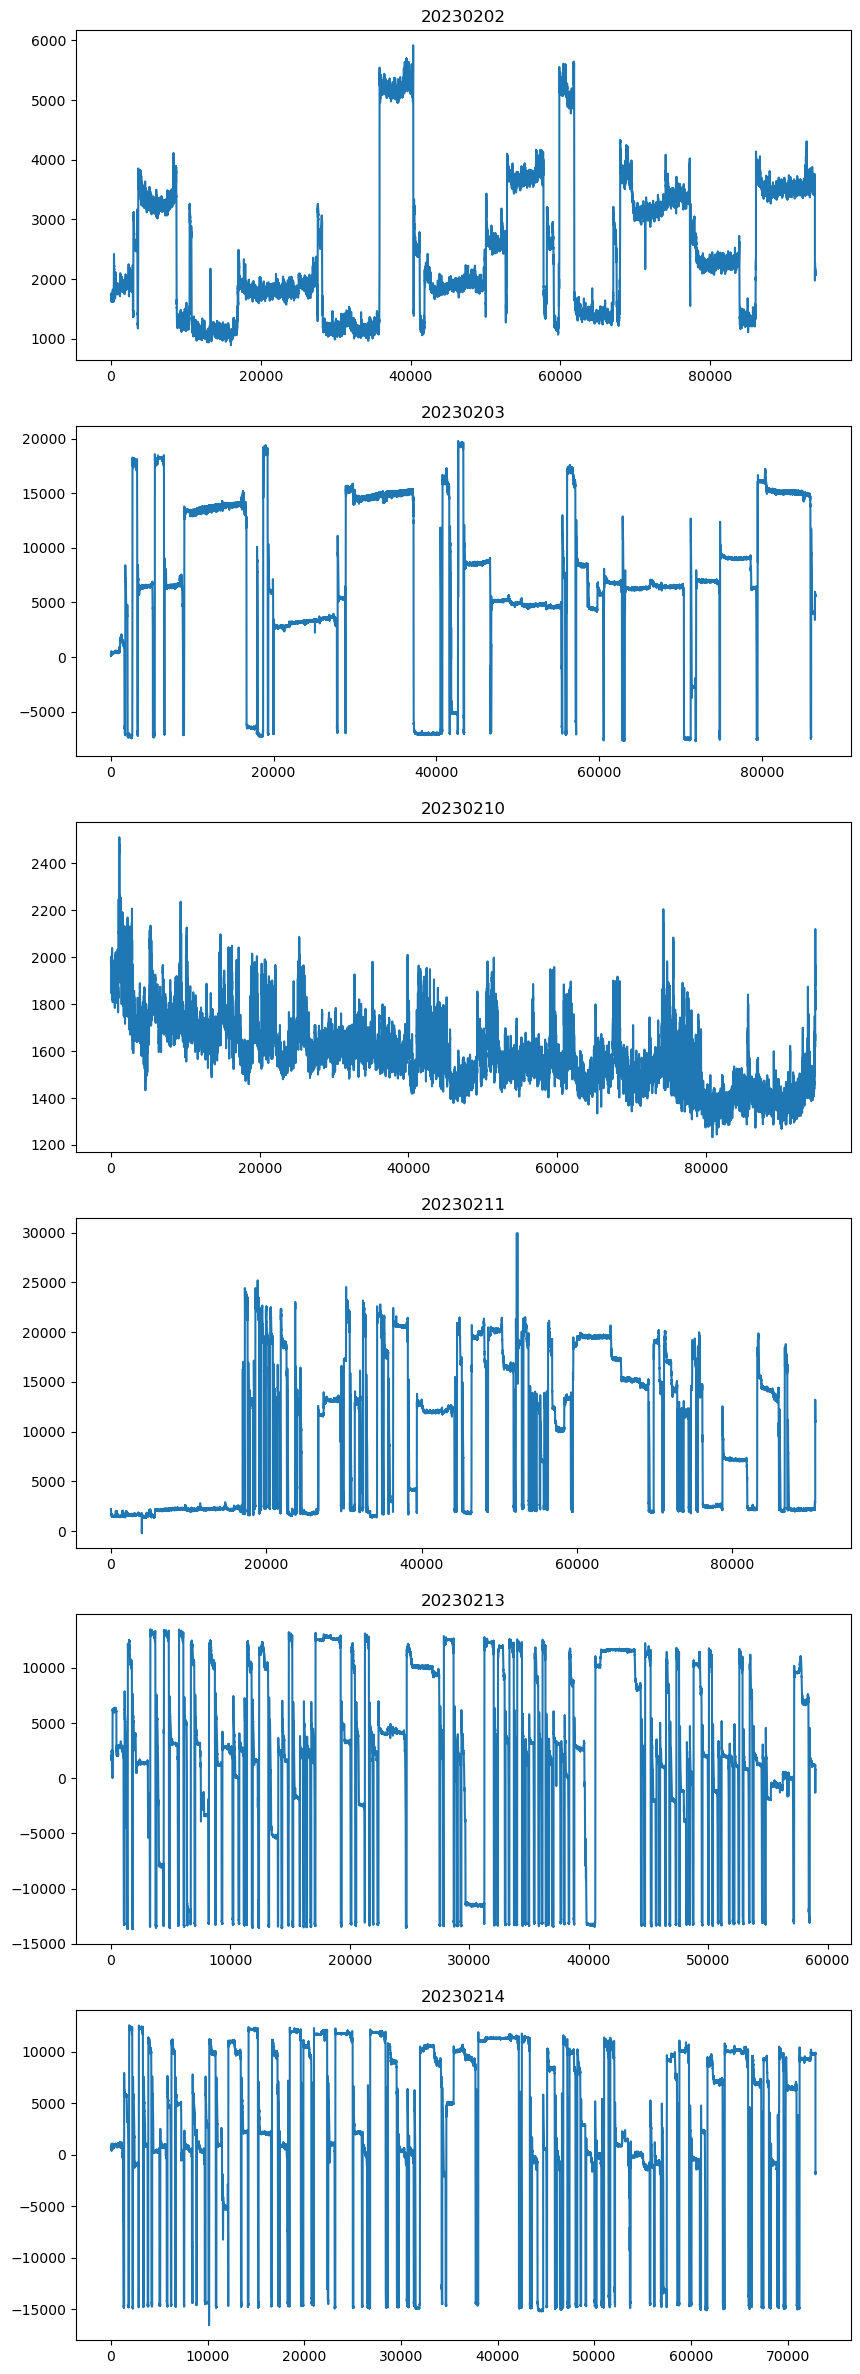

In [36]:
animal = '429420_toms'

plt.figure(figsize=(10,30))
for i,date in enumerate(sessions[animal]):
    plt.subplot(len(sessions[animal]),1,i+1)
    plt.title(date)
    plt.plot(frame_avgs[animal][date])

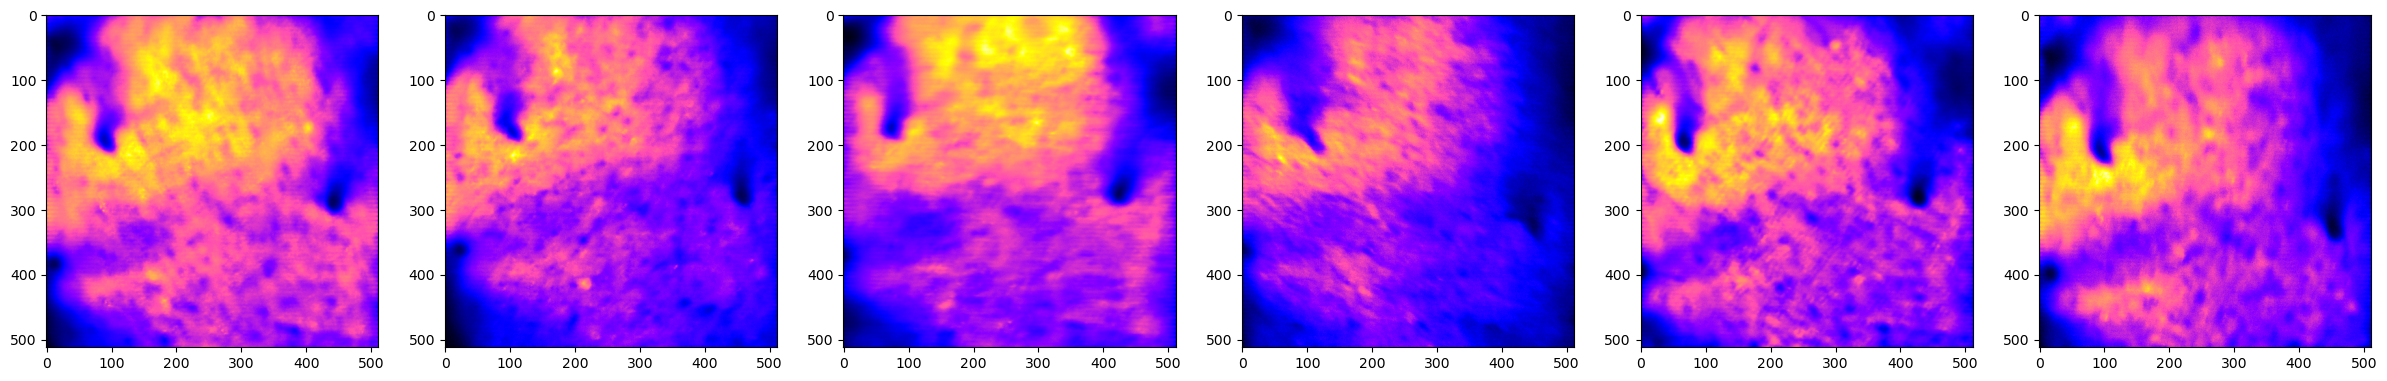

In [20]:
animal = '429419_croc'

plt.figure(figsize=(30,5))
for i,date in enumerate(sessions[animal]):
    plt.subplot(1,len(sessions[animal]),i+1)
    plt.imshow(mean_imgs[animal][date],cmap=plt.cm.gnuplot2)

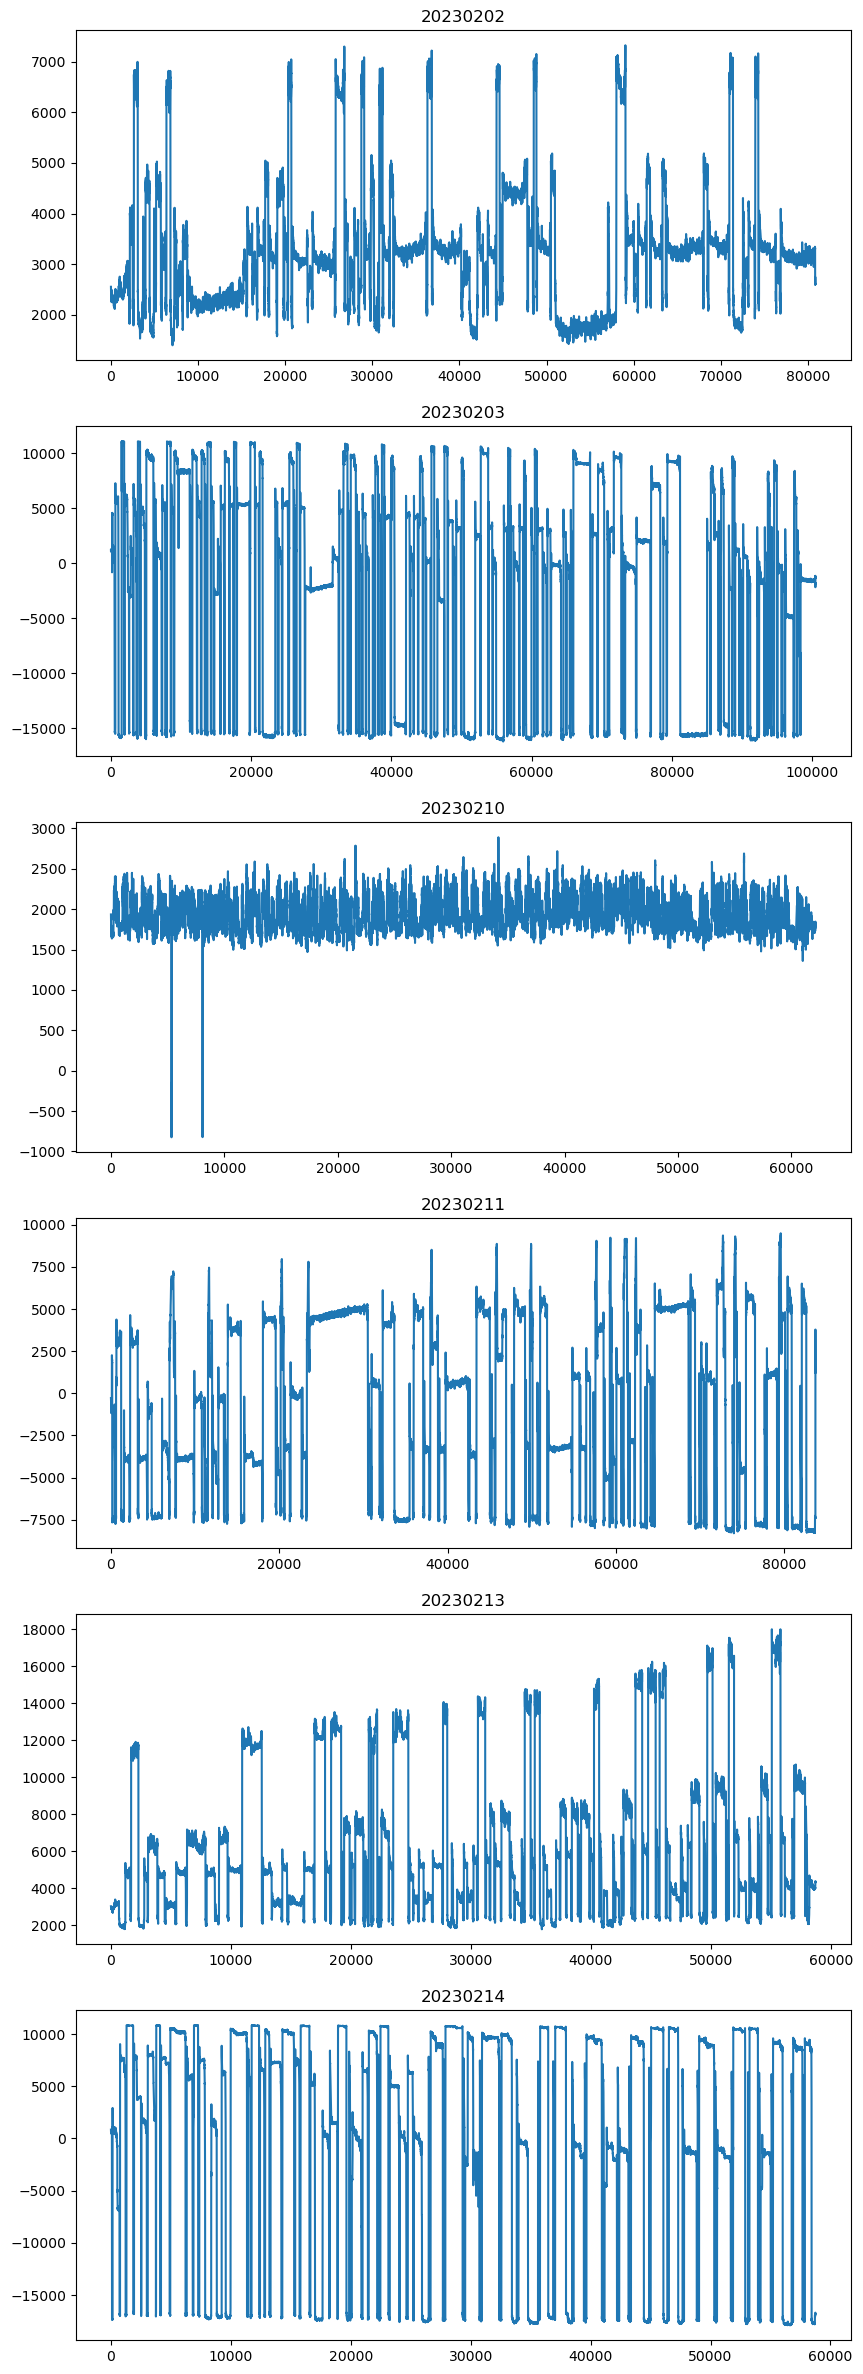

In [38]:
animal = '429419_croc'

plt.figure(figsize=(10,30))
for i,date in enumerate(sessions[animal]):
    plt.subplot(len(sessions[animal]),1,i+1)
    plt.title(date)
    plt.plot(frame_avgs[animal][date])

In [16]:
with open('/ceph/imaging1/davide/2p_data/data_quality/mean_imgs.pickle','wb') as file:
    pickle.dump(mean_imgs,file)
    
with open('/ceph/imaging1/davide/2p_data/data_quality/frame_avgs.pickle','wb') as file:
    pickle.dump(frame_avgs,file)